In [1]:
from pathlib import Path
from datatree import DataTree
import xarray as xr
import pandas as pd
import valenspy as vp
import numpy as np
import flox.xarray as fxr

In [13]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [14]:

#Querry the data you need
EC_Earth3_Veg_data = df.query("table_id== 'day' & source_id == 'EC-Earth3-Veg' & experiment_id == 'historical' & member_id == 'r1i1p1f1' & activity_id == 'CMIP'")
EC_Earth3_Veg_data = EC_Earth3_Veg_data.query("variable_id == 'psl' | variable_id == 'pr'")
EC_Earth3_Veg_data


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
420179,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,day,psl,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20200225
420181,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,day,pr,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20200225


In [15]:

ds1 = xr.open_mfdataset(EC_Earth3_Veg_data.zstore.values, engine='zarr', consolidated=True)
ds1 = ds1.sel(time=slice('1850-01-01', '1850-12-31'))

In [16]:
#Import the local version of the package situated in jcclass
import sys
sys.path.insert(0,'/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/jcclass')

import jcclass
jcclass.__file__

'/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/jcclass/jcclass/__init__.py'

In [17]:
from jcclass import jc
cts_27 = jc(ds1).classification()
cts_11 = jc.eleven_cts(cts_27)

Checking if longitude coordinates are -180 to 180...
Checking latitude coordinates values...
Calculating constants
Checking time formats


/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/jcclass/jcclass/JC_classification.py:108: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dates = [pd.to_datetime(str(time_pd[t].year) + '-' + str(time_pd[t].month) + '-' + str(time_pd[t].day),
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/jcclass/jcclass/JC_classification.py:108: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  dates = [pd.to_datetime(str(time_pd[t].year) + '-' + str(time_pd[t].month) + '-' + str(time_pd[t].day),
/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/jcclass/jcclass/JC_classification.py:108: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `er

Extracting the 16 MSLP gridpoints
Computing flow terms
Computing flow directions
Determining the Circulation types
Saving the data in an xarray format
The End!


<Figure size 640x480 with 0 Axes>

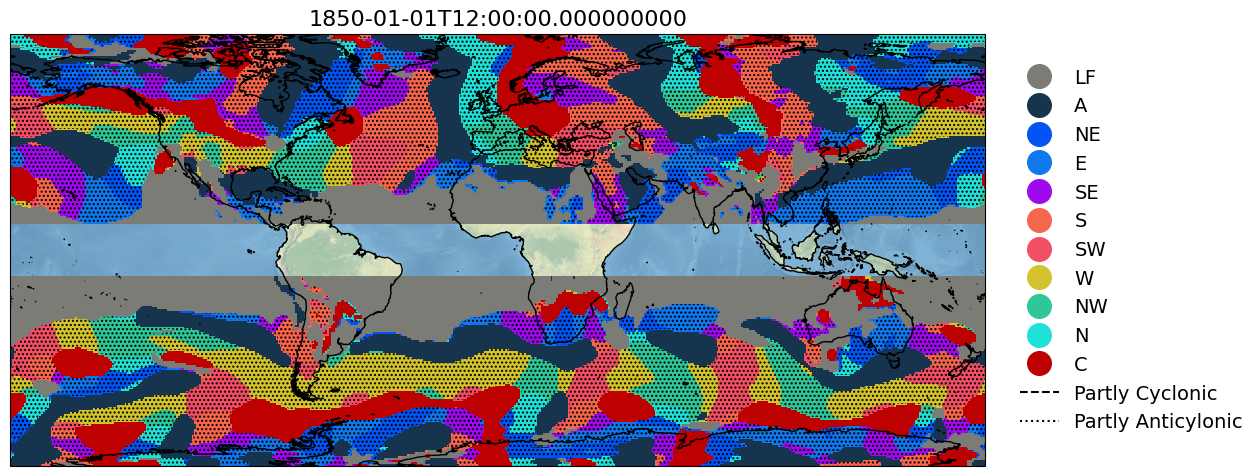

In [18]:
import xarray as xr
date = cts_11.time[0] #selecting the first time
cts = cts_11.sel(time = date)
fig = jc.plot_cts(cts)

In [22]:
cts_11 = cts_11.chunk({"lat": 10, "lon": 10})
cts_11

<xarray.DataArray 'CT' (time: 365, lat: 228, lon: 512)> Size: 341MB
dask.array<xarray-<this-array>, shape=(365, 228, 512), dtype=float64, chunksize=(365, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 1850-01-01T12:00:00 ... 1850-12-31T12:...
  * lat      (lat) float64 2kB -79.65 -78.95 -78.25 -77.54 ... 78.25 78.95 79.65
  * lon      (lon) float64 4kB -179.3 -178.6 -177.9 -177.2 ... 178.6 179.3 180.0

In [47]:
#Option 2: Using flox
labels={-1:"LF", 0:"A", 1:"NE", 2:"E", 3:"SE", 4:"S", 5:"SW", 6:"W", 7:"NW", 8:"N", 9:"C"}
cts_ds = cts_11.to_dataset(name="CT")
cts_ds["CT_cats"] = cts_ds.CT
cts_ds

<xarray.Dataset> Size: 682MB
Dimensions:  (time: 365, lat: 228, lon: 512)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1850-01-01T12:00:00 ... 1850-12-31T12:...
  * lat      (lat) float64 2kB -79.65 -78.95 -78.25 -77.54 ... 78.25 78.95 79.65
  * lon      (lon) float64 4kB -179.3 -178.6 -177.9 -177.2 ... 178.6 179.3 180.0
Data variables:
    CT       (time, lat, lon) float64 341MB dask.array<chunksize=(365, 10, 10), meta=np.ndarray>
    CT_cats  (time, lat, lon) float64 341MB dask.array<chunksize=(365, 10, 10), meta=np.ndarray>

In [27]:
#Option 1: Just xarray
ds_cats = cts_ds.groupby('CT_cats', squeeze=False, labels=["LF","A"]).count(dim='time', fill_value=0)

In [ ]:
import matplotlib.pyplot as plt
ds_cats.CT.plot(col='CT_cats', col_wrap=4)
plt.show()

labels=["LF","A","NE","E","SE","S","SW","W","NW","N","C"]

In [59]:

ds_2 = fxr.xarray_reduce(cts_ds, cts_ds.CT_cats, labels=labels, func="count", expected_groups=[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fill_value=0, dim='time')

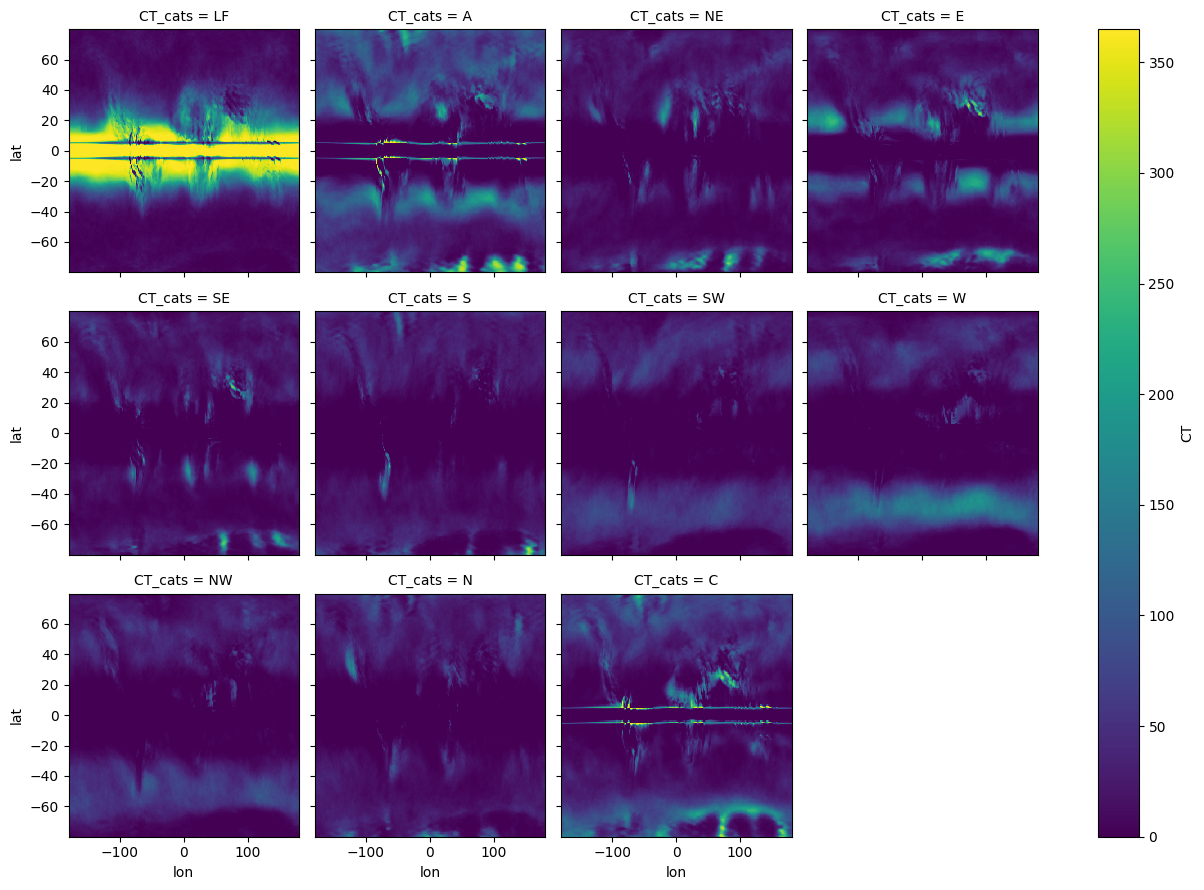

In [62]:
#Rename the CAT_cats dimension to the labels
labels=["LF","A","NE","E","SE","S","SW","W","NW","N","C"]
ds_2 = ds_2.assign_coords(CT_cats=labels) 
ds_2.CT.plot(col='CT_cats', col_wrap=4)
plt.show()

In [9]:
#Merge the cts_11 with the original dataset
ds_m = xr.merge([ds1, cts_11])
ds_m

/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/valenspy_dev/lib/python3.9/site-packages/dask/array/core.py:4836: PerformanceWarning: Increasing number of chunks by factor of 23
  result = blockwise(


<xarray.Dataset> Size: 1GB
Dimensions:    (lat: 256, lon: 767, time: 365, bnds: 2)
Coordinates:
  * lat        (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
  * lon        (lon) float64 6kB -179.3 -178.6 -177.9 ... 357.9 358.6 359.3
  * time       (time) datetime64[ns] 3kB 1850-01-01T12:00:00 ... 1850-12-31T1...
    lat_bnds   (lat, bnds) float64 4kB dask.array<chunksize=(256, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 12kB dask.array<chunksize=(767, 2), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(365, 1), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 287MB dask.array<chunksize=(128, 256, 767), meta=np.ndarray>
    psl        (time, lat, lon) float32 287MB dask.array<chunksize=(133, 256, 767), meta=np.ndarray>
    CT         (time, lat, lon) float64 573MB dask.array<chunksize=(365, 24, 10), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  65744.0
    cmor_version:           3.4.0
    ...                     ...
    title:                  EC-Earth3-Veg output prepared for CMIP6
    tracking_id:            hdl:21.14100/cecc9931-3518-46c0-b177-08ab95b77b44...
    variable_id:            pr
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/cecc9931-3518-46c0-b177-08ab95b77b44...
    version_id:             v20200225